In [1]:
%load_ext autoreload
%load_ext autotime
%autoreload 2

## Imports and Project Path

In [2]:
# importing packages
import os, sys
import pandas as pd
import numpy as np
import sqlite3

# setting project path
gparent = os.path.join(os.pardir, os.pardir)
sys.path.append(gparent)

from IPython.display import Audio
sound_file = '/Users/dsbox/Documents/Flatiron/phase_5/WAILERLP.wav'

from dython.nominal import associations

from src import class_Database as d
from src import helper_functions as f
from src import visualizations as v

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_theme('talk')
plt.style.use('fivethirtyeight')
sns.set_palette('GnBu_r')
pd.options.display.max_rows = 300

time: 5.52 s


## Creating The Database

In [3]:
# creating database & database class instance
database_name = 'outcomes.db'
db = d.Database(database_name)

time: 1.37 ms


**Run The Cell Below Once And Then Comment Out**

In [4]:
# file_name = 'anonymisedData.zip'
# db.populate(file_name, database_name)

time: 448 µs


## Creating SQL `conn`, `cur`

In [5]:
data_path = os.path.join(gparent,'data/processed','outcomes.db')
conn = sqlite3.connect(data_path)  
cur = conn.cursor()

time: 1.65 ms


### Database ERD

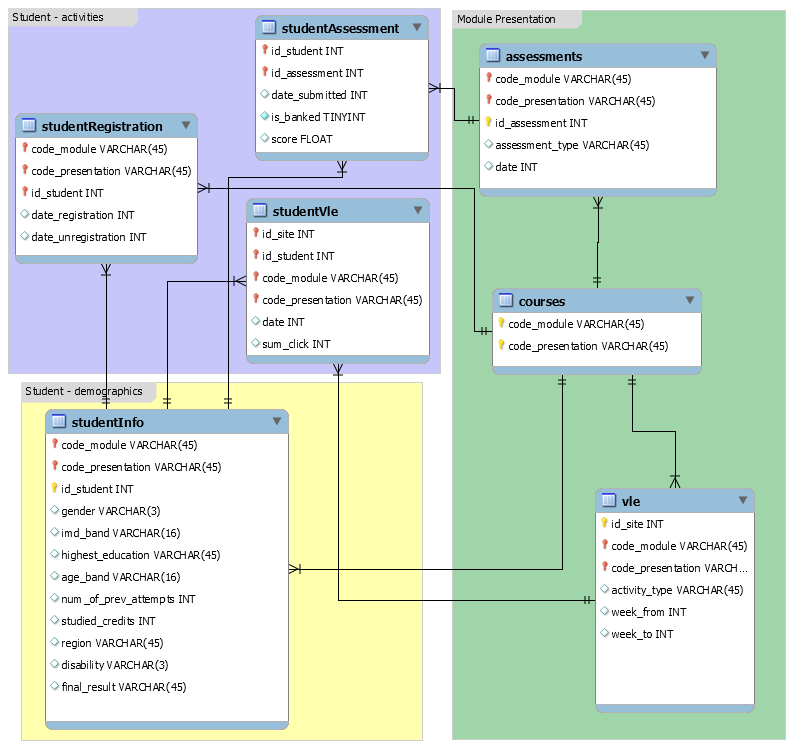

time: 3.55 ms


In [6]:
db.erd

# Half Term Data Experiments

## Registration Data

## W After Midpoint DF

In [7]:
after_date = db.registration_data_df(120)

time: 117 ms


In [8]:
after_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24770 entries, 0 to 32592
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_registration    24770 non-null  float64
 1   date_unregistration  2255 non-null   float64
 2   row_id               24770 non-null  object 
dtypes: float64(2), object(1)
memory usage: 774.1+ KB
time: 9.3 ms


## Student Assessment Data

## Median Score DF

In [9]:
median_score = db.median_score_df(120)

time: 497 ms


In [10]:
median_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23316 entries, 0 to 23315
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_student    23316 non-null  object 
 1   median_score  23298 non-null  float64
dtypes: float64(1), object(1)
memory usage: 364.4+ KB
time: 7.3 ms


## Student Info & Student Assessment Data 

In [11]:
df = db.student_info_assessment(120)

time: 939 ms


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26692 entries, 0 to 26691
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   score                 26643 non-null  object 
 1   code_module           26692 non-null  object 
 2   code_presentation     26692 non-null  object 
 3   id_student            26692 non-null  object 
 4   gender                26692 non-null  object 
 5   region                26692 non-null  object 
 6   highest_education     26692 non-null  object 
 7   imd_band              25679 non-null  object 
 8   age_band              26692 non-null  object 
 9   num_of_prev_attempts  26692 non-null  object 
 10  studied_credits       26692 non-null  object 
 11  disability            26692 non-null  object 
 12  final_result          26692 non-null  object 
 13  date_sub              26692 non-null  int64  
 14  course_length         26692 non-null  int64  
 15  row_id             

In [13]:
# checking summary stats
df.describe()

,date_sub,course_length,target,weighted_ave,mean_score
count,26692.000000,26692.000000,26692.000000,26673.000000,26673.000000
mean,25.178406,239.672411,0.424697,108.957218,74.176317
std,13.932813,5.421583,0.494306,73.455695,16.015786
min,-11.000000,234.000000,0.000000,0.000000,0.000000
25%,18.000000,240.000000,0.000000,56.000000,66.000000
50%,21.000000,240.000000,0.000000,111.200000,77.500000
75%,31.000000,241.000000,1.000000,155.200000,85.555556
max,119.000000,268.000000,1.000000,663.660000,100.000000


time: 26.2 ms


In [14]:
# checking first 5 rows
df.head()

,score,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_sub,course_length,row_id,target,weighted_ave,mean_score
0,92,FFF,2013J,100064,F,West Midlands Region,A Level or Equivalent,0-10%,35-55,0,60,N,Pass,40,240,FFF2013J100064,0,186.00,92.666667
1,78,BBB,2013J,100282,F,Wales,Lower Than A Level,20-30%,0-35,1,120,N,Withdrawn,19,234,BBB2013J100282,1,15.60,78.000000
2,70,DDD,2014J,100561,M,East Anglian Region,Lower Than A Level,70-80%,0-35,1,60,N,Fail,20,240,DDD2014J100561,1,163.00,78.000000
3,78,FFF,2014B,1006742,M,Scotland,HE Qualification,80-90%,55<=,1,120,N,Fail,21,240,FFF2014B1006742,1,39.00,78.500000
4,100,CCC,2014J,100788,M,Scotland,HE Qualification,80-90%,0-35,1,60,N,Distinction,21,241,CCC2014J100788,0,106.18,92.125000


time: 16.3 ms


## Removing Weighted Average Outliers with IQR Fences

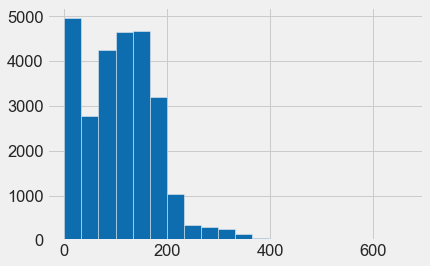

time: 159 ms


In [15]:
# checking distribution
df.weighted_ave.hist(bins=20);

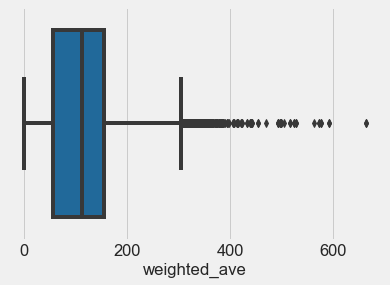

time: 112 ms


In [16]:
# checking boxplot for outliers
sns.boxplot(x=df['weighted_ave']);

In [17]:
# checking summary statistics
df.weighted_ave.describe()

count    26673.000000
mean       108.957218
std         73.455695
min          0.000000
25%         56.000000
50%        111.200000
75%        155.200000
max        663.660000
Name: weighted_ave, dtype: float64

time: 6.76 ms


In [18]:
# checking shape
df.shape

(26692, 19)

time: 1.97 ms


In [19]:
df = db.drop_outliers(df, 'weighted_ave')

time: 14.4 ms


In [20]:
# checking shape
df.shape

(26264, 19)

time: 1.81 ms


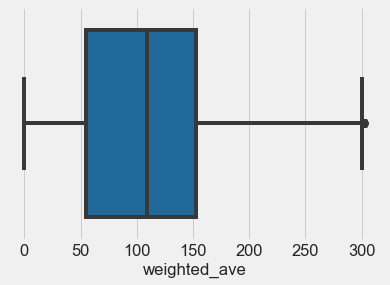

time: 93.1 ms


In [21]:
# rechecking boxplot
sns.boxplot(x=df['weighted_ave']);

In [22]:
# checking summary statistics
df.weighted_ave.describe()

count    26245.000000
mean       104.953112
std         66.574956
min          0.000000
25%         54.480000
50%        109.560000
75%        153.000000
max        303.840000
Name: weighted_ave, dtype: float64

time: 6.75 ms


## StudentVLE

In [23]:
svc = db.studentvle_df(120)

time: 2.74 s


In [24]:
# checking info
svc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27800 entries, 0 to 27799
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   code_module        27800 non-null  object
 1   code_presentation  27800 non-null  object
 2   id_student         27800 non-null  object
 3   id_site            27800 non-null  object
 4   date               27800 non-null  object
 5   sum_click          27800 non-null  object
 6   row_id             27800 non-null  object
 7   sum_activity       27800 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 1.7+ MB
time: 16.3 ms


In [25]:
# checking summary statistics
svc.describe()

,sum_activity
count,27800.000000
mean,278.481583
std,352.925576
min,2.000000
25%,59.000000
50%,160.000000
75%,359.000000
max,5806.000000


time: 7.38 ms


## Merging Median Score Data

In [26]:
# merging median-scores to sv_si
df = df.merge(median_score, on='id_student')

time: 40.5 ms


In [27]:
# checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26264 entries, 0 to 26263
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   score                 26215 non-null  object 
 1   code_module           26264 non-null  object 
 2   code_presentation     26264 non-null  object 
 3   id_student            26264 non-null  object 
 4   gender                26264 non-null  object 
 5   region                26264 non-null  object 
 6   highest_education     26264 non-null  object 
 7   imd_band              25287 non-null  object 
 8   age_band              26264 non-null  object 
 9   num_of_prev_attempts  26264 non-null  object 
 10  studied_credits       26264 non-null  object 
 11  disability            26264 non-null  object 
 12  final_result          26264 non-null  object 
 13  date_sub              26264 non-null  int64  
 14  course_length         26264 non-null  int64  
 15  row_id             

In [28]:
# dropping extraneous cols
drops = ['code_module','code_presentation','id_student']
df = df.drop(drops, axis=1)

time: 18.3 ms


## Merging StudentVLE

In [29]:
# dropping extraneous cols
drops = ['code_module','code_presentation','id_student']
svc = svc.drop(drops, axis=1)

# merging
df = df.merge(svc, on='row_id')

time: 40.8 ms


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24976 entries, 0 to 24975
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   score                 24940 non-null  object 
 1   gender                24976 non-null  object 
 2   region                24976 non-null  object 
 3   highest_education     24976 non-null  object 
 4   imd_band              24015 non-null  object 
 5   age_band              24976 non-null  object 
 6   num_of_prev_attempts  24976 non-null  object 
 7   studied_credits       24976 non-null  object 
 8   disability            24976 non-null  object 
 9   final_result          24976 non-null  object 
 10  date_sub              24976 non-null  int64  
 11  course_length         24976 non-null  int64  
 12  row_id                24976 non-null  object 
 13  target                24976 non-null  int64  
 14  weighted_ave          24963 non-null  float64
 15  mean_score         

In [31]:
# checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24976 entries, 0 to 24975
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   score                 24940 non-null  object 
 1   gender                24976 non-null  object 
 2   region                24976 non-null  object 
 3   highest_education     24976 non-null  object 
 4   imd_band              24015 non-null  object 
 5   age_band              24976 non-null  object 
 6   num_of_prev_attempts  24976 non-null  object 
 7   studied_credits       24976 non-null  object 
 8   disability            24976 non-null  object 
 9   final_result          24976 non-null  object 
 10  date_sub              24976 non-null  int64  
 11  course_length         24976 non-null  int64  
 12  row_id                24976 non-null  object 
 13  target                24976 non-null  int64  
 14  weighted_ave          24963 non-null  float64
 15  mean_score         

In [32]:
df.course_length.value_counts()

240    10794
241     7746
234     5730
268      706
Name: course_length, dtype: int64

time: 3.07 ms


## Merging After Midpoint Reg Data

In [33]:
# merging after midpoint data
df = df.merge(after_date, how='right', on='row_id')

time: 31 ms


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24770 entries, 0 to 24769
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   score                 22202 non-null  object 
 1   gender                22219 non-null  object 
 2   region                22219 non-null  object 
 3   highest_education     22219 non-null  object 
 4   imd_band              21332 non-null  object 
 5   age_band              22219 non-null  object 
 6   num_of_prev_attempts  22219 non-null  object 
 7   studied_credits       22219 non-null  object 
 8   disability            22219 non-null  object 
 9   final_result          22219 non-null  object 
 10  date_sub              22219 non-null  float64
 11  course_length         22219 non-null  float64
 12  row_id                24770 non-null  object 
 13  target                22219 non-null  float64
 14  weighted_ave          22217 non-null  float64
 15  mean_score         

In [35]:
# checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24770 entries, 0 to 24769
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   score                 22202 non-null  object 
 1   gender                22219 non-null  object 
 2   region                22219 non-null  object 
 3   highest_education     22219 non-null  object 
 4   imd_band              21332 non-null  object 
 5   age_band              22219 non-null  object 
 6   num_of_prev_attempts  22219 non-null  object 
 7   studied_credits       22219 non-null  object 
 8   disability            22219 non-null  object 
 9   final_result          22219 non-null  object 
 10  date_sub              22219 non-null  float64
 11  course_length         22219 non-null  float64
 12  row_id                24770 non-null  object 
 13  target                22219 non-null  float64
 14  weighted_ave          22217 non-null  float64
 15  mean_score         

In [36]:
# checking summary statistics
df.describe()

,date_sub,course_length,target,weighted_ave,mean_score,median_score,sum_activity,date_registration,date_unregistration
count,22219.000000,22219.000000,22219.000000,22217.000000,22217.000000,22217.000000,22219.000000,24770.000000,2255.000000
mean,25.178541,239.721995,0.327918,113.110186,75.296531,75.653936,313.787119,-65.488736,170.795565
std,14.311197,5.701796,0.469465,65.361515,14.850148,14.772224,369.247540,47.117116,33.475645
min,-11.000000,234.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-311.000000,121.000000
25%,18.000000,240.000000,0.000000,68.800000,67.666667,68.000000,80.000000,-94.000000,144.000000
50%,21.000000,240.000000,0.000000,120.560000,78.333333,78.000000,192.000000,-52.000000,165.000000
75%,31.000000,241.000000,1.000000,159.000000,86.000000,86.000000,408.000000,-29.000000,198.000000
max,119.000000,268.000000,1.000000,303.840000,100.000000,100.000000,5806.000000,167.000000,444.000000


time: 44.4 ms


## Associations

In [37]:
# num_cols = ['target', 'date', 'num_of_prev_attempts',
#             'studied_credits', 'sum_click', 'click_sum', 'num_activities',
#             'date_sub', 'course_length',]
# associations(q1, numerical_columns=num_cols, 
#              bias_correction=False, figsize=(20,20), cmap='GnBu_r')

time: 563 µs


In [38]:
# outputting data to csv file
path = os.path.join(gparent, 'data/processed/test.csv')
df.to_csv(path, index=False)

time: 178 ms


In [39]:
Audio(sound_file, autoplay=True)

time: 6.19 ms


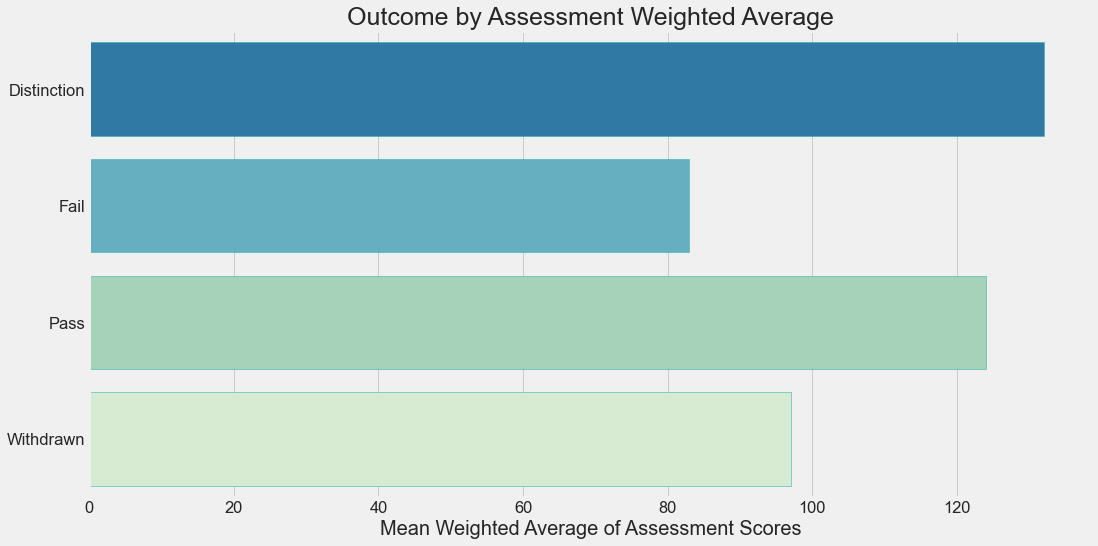

time: 148 ms


In [40]:
v.outcomes_wa(df)

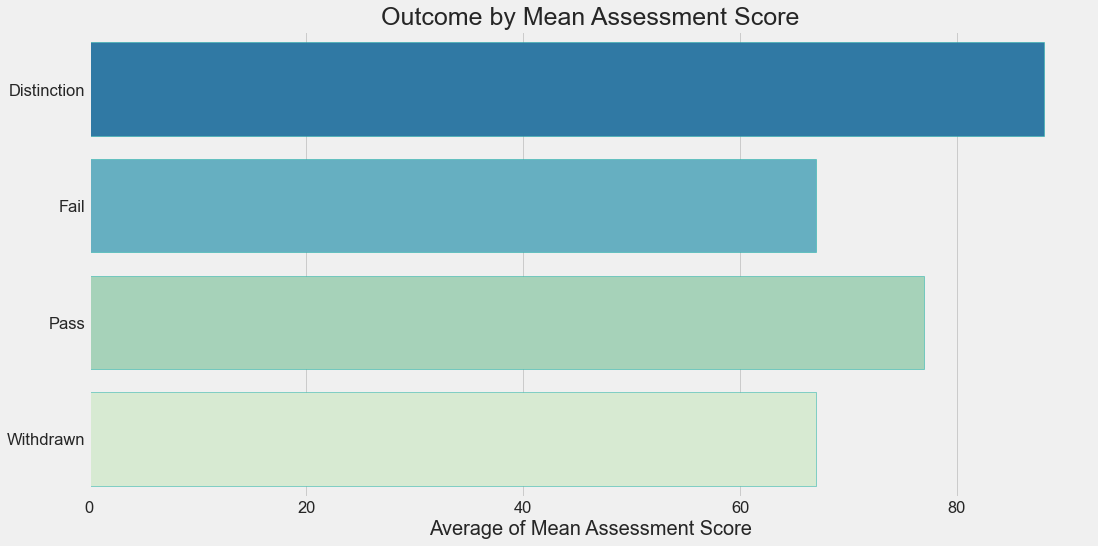

time: 125 ms


In [41]:
v.outcomes_mean(df)